In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.2.0'

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 
               'Bag', 'Ankle boot']

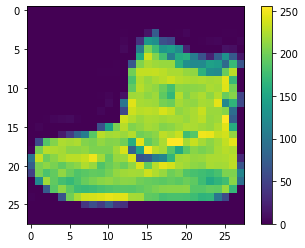

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

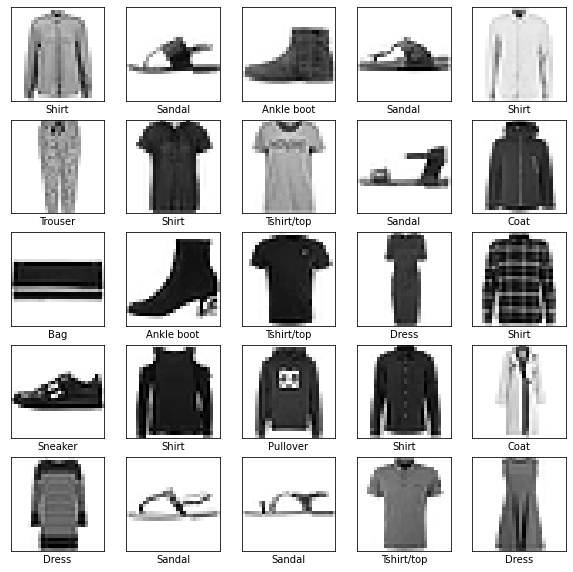

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    r = np.random.randint(0, train_images.shape[0])
    plt.imshow(train_images[r], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[r]])
plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5014 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3777 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3406 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3152 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2977 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2843 - accuracy: 0.8939
Epoch 7/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.2716 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2597 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2488 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

In [17]:
history.history['accuracy']

[0.8238499760627747,
 0.8633000254631042,
 0.8756833076477051,
 0.8841166496276855,
 0.8905333280563354,
 0.8939333558082581,
 0.8987500071525574,
 0.9026166796684265,
 0.9076333045959473,
 0.9090833067893982]

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

test_acc

313/313 - 0s - loss: 0.3788 - accuracy: 0.8741


0.8741000294685364

In [12]:
predictions = model.predict(test_images)

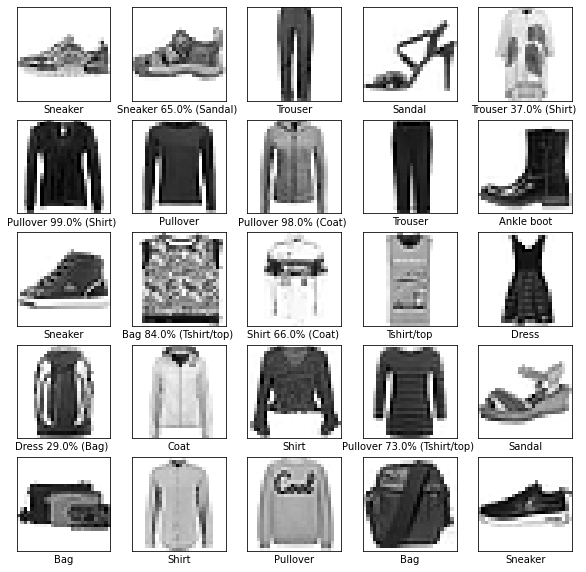

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    r = np.random.randint(0, test_images.shape[0])
    plt.imshow(test_images[r], cmap=plt.cm.binary)
    pred_label = predictions[r].argmax()
    pct = predictions[r].max()
    pct = str((pct*100).round(0))
    if class_names[pred_label] == class_names[test_labels[r]]:
        plt.xlabel(class_names[pred_label])
    else:
        plt.xlabel(class_names[pred_label]+ " " +  pct +"% (" + class_names[test_labels[r]] + ") ")
plt.show()